In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import pathlib
import pandas as pd
import numpy as np

"""Load data """
#df = pd.read_excel(r'C:\Users\anotator\Desktop\VALIDACE_KPI\data\evidence\honda\HSC.xlsx')
df = pd.read_excel('/home/evzen/Downloads/HSC-08-06.xlsx')

In [2]:
"""Filter columns and drop row"""
df1 = df.iloc[:,[0,3,4,34,35,36,39,40]].drop(0, axis=0)

df1 = df1[df1["Stav videa (info pro logistika a validátory)"] == "Zvalidované a validátorem uložené v archivu"]

In [3]:
date = "2019-08"
name = "Couf"

df1["Start date "] = df1["Start date "].astype(str)
df1["Annotator's name"] = df1["Annotator's name"].astype(str)
df1= df1[df1["Start date "].str.contains(date)]
list_of_names = df1["Annotator's name"].unique().tolist()
df2 = df1[df1["Annotator's name"].str.contains(name)]
suma = df2["Annotation Ratio NET/1500fr [min]"].sum()
videos = len(df2["File name"].dropna())
#if videos = 0:
    
print(suma, videos)
df2

125.8322237 0


,File name,Annotator's name,Start date,Annotation Ratio NET/1500fr [min],[min] per 1 dyn.obj.,Annotation Ratio RB/1500fr. [min],Validation Ratio,Stav videa (info pro logistika a validátory)
3600,NaN,Coufal Jan,2019-08-05 00:00:00,125.832224,16.5,59.920107,24.966711,Zvalidované a validátorem uložené v archivu


In [12]:
#df.iloc[[3599, 3600], :]
file_name = df2.index - 1
ar2 = df.iloc[file_name, 34]


3599    87.882823
Name: Annotation Ratio NET/1500fr [min], dtype: float64

In [14]:

array_names = np.array([])
array_ars = np.array([])

for x in list_of_names:
    df2 = df1[df1["Annotator's name"].str.contains(x)]
    suma = df2["Annotation Ratio NET/1500fr [min]"].sum()
    videos = len(df2["File name"].dropna())
    ar = suma/videos
    array_names = np.append(array_names, x)
    array_ars = np.append(array_ars, ar)

    #print(x, ar)
    
d = {'Name': array_names, 'AR': array_ars}
daily_df = pd.DataFrame(data=d)
daily_df = daily_df.sort_values(by=['AR'])

daily_df = daily_df.reset_index(drop=True)

daily_df.iloc[29,1] = 125

daily_df = daily_df.sort_values(by=['AR'])

daily_df = daily_df.reset_index(drop=True)


daily_df.describe()
daily_df

/home/evzen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in double_scalars
  if __name__ == '__main__':


,Name,AR
0,Krejčí Dan,60.145254
1,Krejčí Petr,68.064118
2,Kvapilová Kamila,70.699258
3,Němeček Ondřej,72.076925
4,Kapoun Jan,74.763126
5,Flek Tomáš,74.948246
6,Nováková Jana,76.154086
7,Syroťuk Alexandr,82.305384
8,Horáček Radek,92.148840
9,Pokorný Tomáš,94.379038


In [15]:
daily_df.iloc[29,1] = 125
daily_df.describe()

,AR
count,30.000000
mean,117.799719
std,46.571212
min,60.145254
25%,84.766248
50%,106.650560
75%,127.330640
max,228.286626


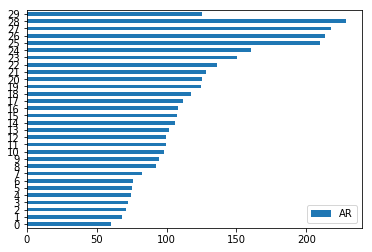

In [23]:
daily_df.set_index("Name")
daily_df.plot.barh()